In [231]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import joblib

### Exploaring the data

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df[df.charges == df.charges.max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [9]:
df[df.charges == df.charges.min()]

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739


In [8]:
df[df.charges > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [90]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [102]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Data Analysis

In [12]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [19]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

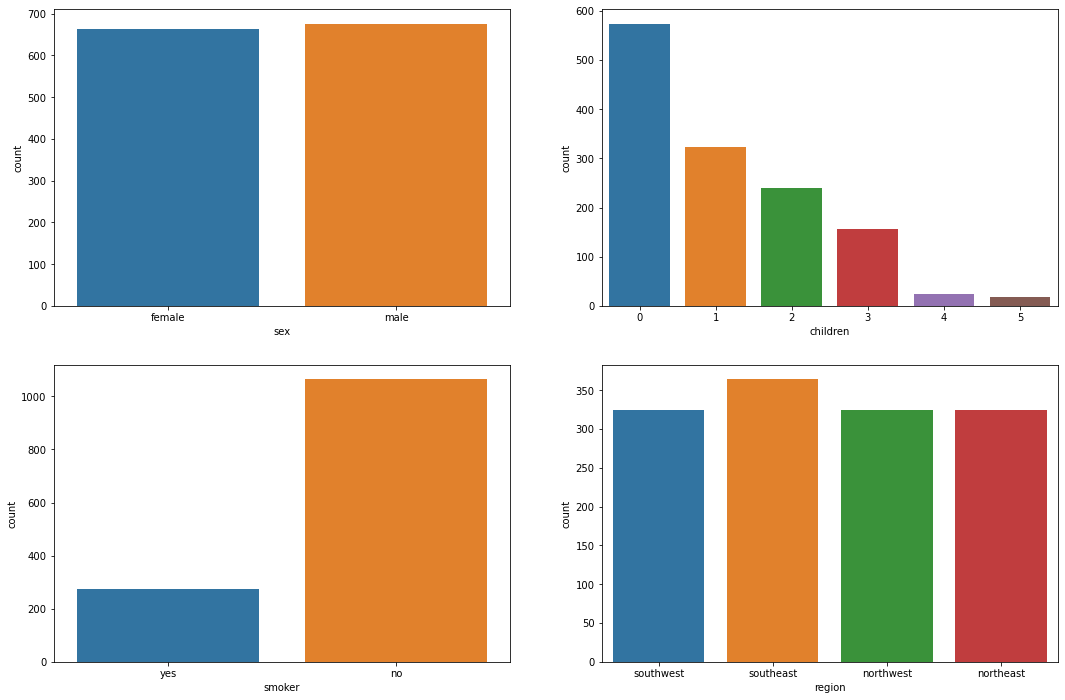

In [18]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='sex', data=df);

plt.subplot(2,2,2)
sns.countplot(x='children', data=df);

plt.subplot(2,2,3)
sns.countplot(x='smoker', data=df);

plt.subplot(2,2,4)
sns.countplot(x='region', data=df);

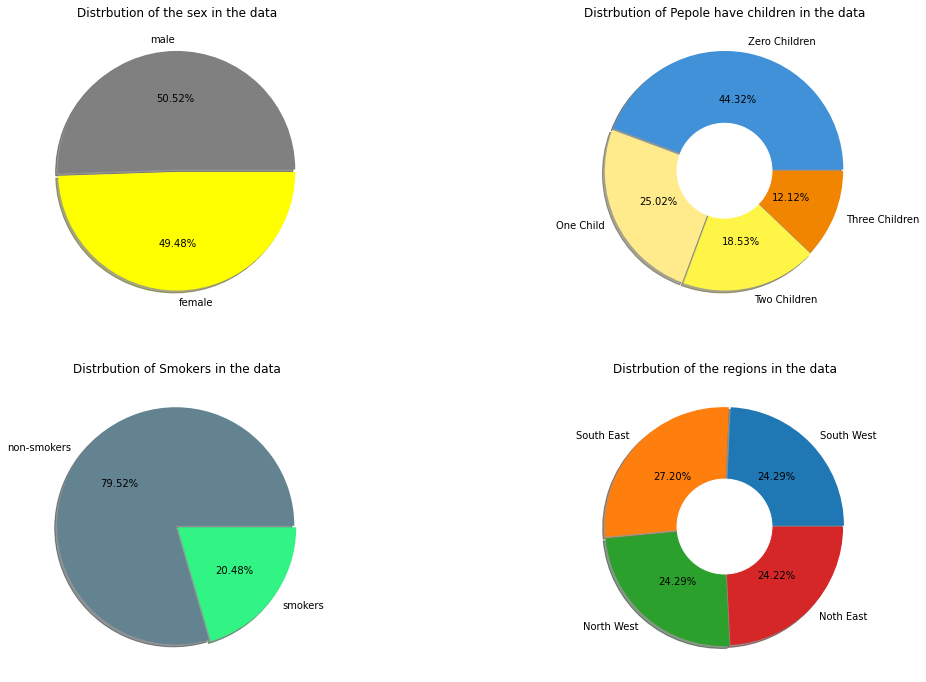

In [60]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Distrbution of the sex in the data")
male = df.sex[df.sex == 'male'].count()
female = df.sex[df.sex == 'female'].count()
plt.pie([male, female], labels=['male', 'female'], autopct="%.2f%%", explode=[0.01,0.01], shadow=True, colors=['grey', 'yellow'])

plt.subplot(2,2,2)
plt.title("Distrbution of Pepole have children in the data")
zero_children = df.children[df.children == 0].count()
one_children = df.children[df.children == 1].count()
two_children = df.children[df.children == 2].count()
three_children = df.children[df.children == 3].count()
size=[zero_children, one_children, two_children, three_children]
my_circle = plt.Circle( (0,0), 0.4, color='white')
labels = ['Zero Children', 'One Child', 'Two Children', 'Three Children']
plt.pie(size, labels=labels, autopct="%.2f%%", explode=[0.01,0.01, 0.01, 0], shadow=True, colors=['#4191d9', '#ffeb8c', '#fff547', '#f28500'])
plt.gcf().gca().add_artist(my_circle)

plt.subplot(2,2,3)
plt.title("Distrbution of Smokers in the data")
no_smokers = df.smoker[df.smoker == 'no'].count()
yes_smokers = df.smoker[df.smoker == 'yes'].count()
plt.pie([no_smokers, yes_smokers], labels=['non-smokers', 'smokers'], autopct="%.2f%%", explode=[0.01,0.01], shadow=True, colors=['', '#31f484'])

plt.subplot(2,2,4)
plt.title('Distrbution of the regions in the data')
southwest = df.region[df.region == 'southwest'].count()
southeast = df.region[df.region == 'southeast'].count()
northwest = df.region[df.region == 'northwest'].count()
northeast = df.region[df.region == 'northeast'].count()

size_2 = [southwest, southeast, northwest, northeast]
labels_2 = ['South West', 'South East', 'North West', 'Noth East']
my_circle2 = plt.Circle( (0,0), 0.4, color='white')
plt.pie(size_2, labels=labels_2, autopct="%.2f%%", explode=[0.01,0.01, 0.01, 0], shadow=True)
plt.gcf().gca().add_artist(my_circle2)

plt.show()

non-smokers and pepole with no childern have the majority in the dataset<br>
sex and regions are pretty equal

C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


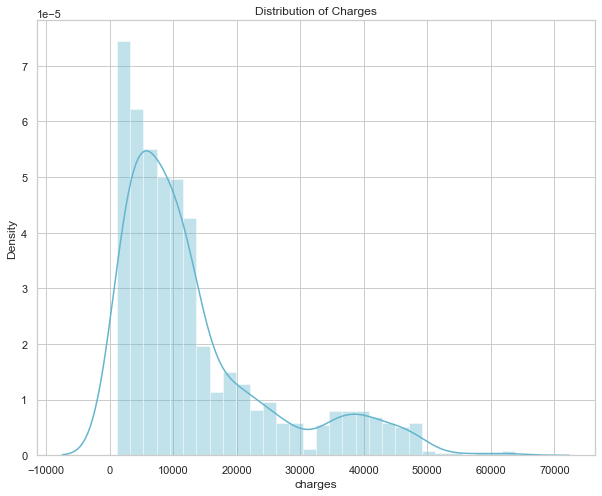

In [63]:
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
plt.title('Distribution of Charges')
sns.distplot(df['charges'], kde = True, color = 'c')
plt.show()

This distribution is right-skewed. To make it closer to normal we can apply natural log



C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


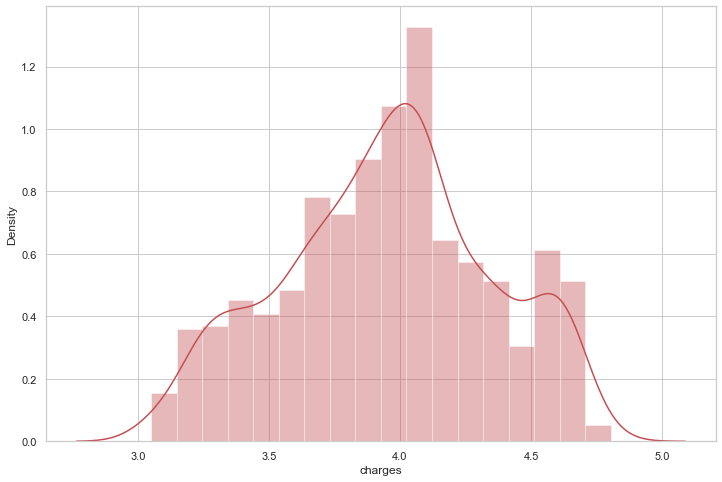

In [65]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


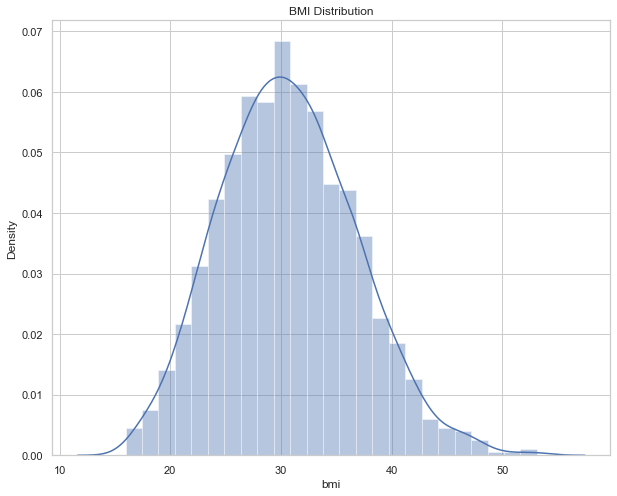

In [87]:
plt.figure(figsize=(10,8))
sns.distplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

In [69]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


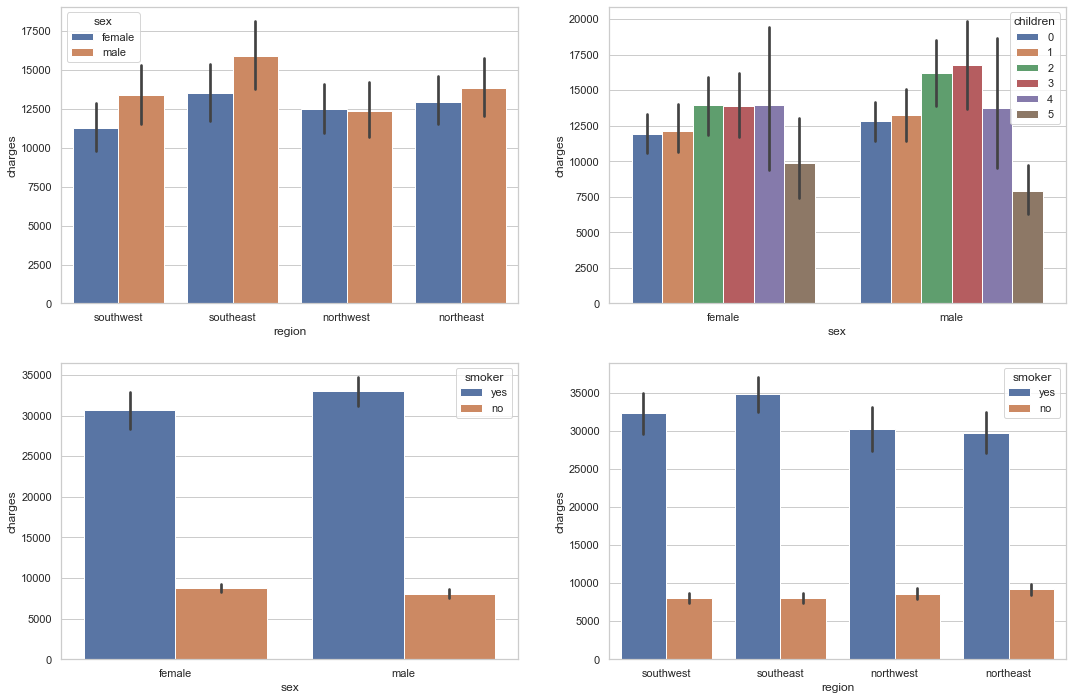

In [74]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.barplot(x='region', y='charges', hue='sex', data=df)

plt.subplot(2,2,2)
sns.barplot(x='sex', y='charges', hue='children', data=df)

plt.subplot(2,2,3)
sns.barplot(x='sex', y='charges', hue='smoker', data=df)

plt.subplot(2,2,4)
sns.barplot(x='region', y='charges', hue='smoker', data=df);

southeast males pays more charges<br>
males with 2,3 childrens pays more charges<br>
smokers clearly pay ways more than non smokers<br>
southeast smokers pays the most

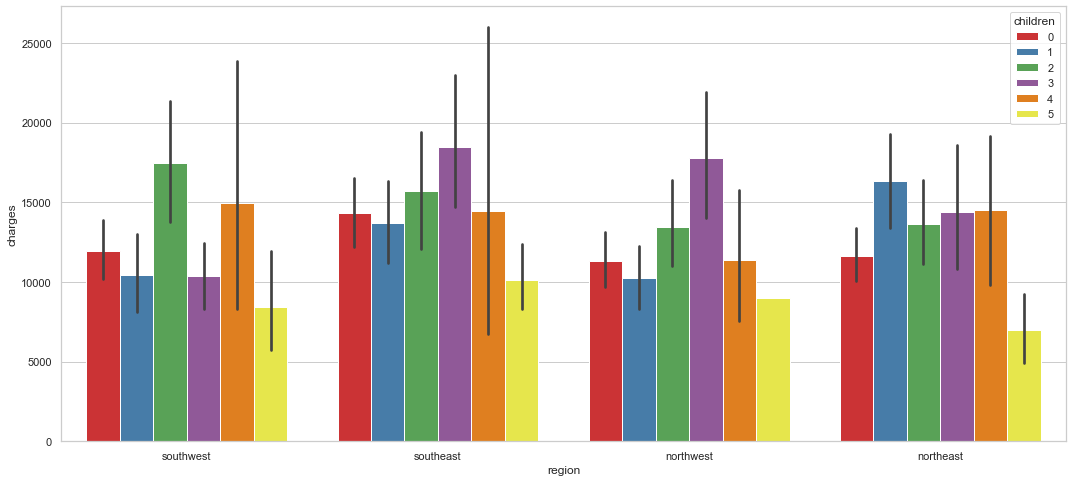

In [76]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

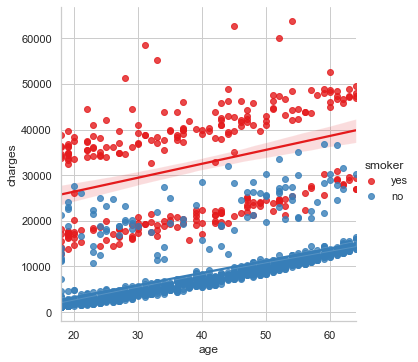

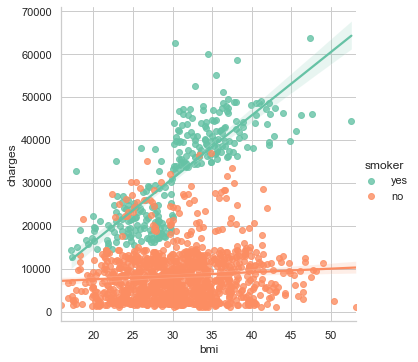

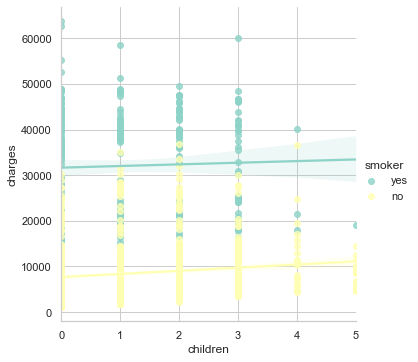

In [83]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3');

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less

### Data PreProcessing

In [93]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [95]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [97]:
df.sex = df.sex.apply(lambda x: 1 if x=='male' else 0)

In [98]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [100]:
df.smoker = df.smoker.apply(lambda x: 1 if x=='yes' else 0)

In [101]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#### apply one hot encoder

In [103]:
dummies = pd.get_dummies(df.region, drop_first=True)
dummies.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [105]:
df2 = pd.concat([df, dummies], axis=1)
df2.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [106]:
df2.shape

(1338, 10)

In [107]:
df2.drop('region', axis=1, inplace=True)
df2.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


#### Assign Feature and target variables

In [110]:
X = df2.drop('charges', axis=1)
y = df2.charges

a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X

In [111]:
pol = PolynomialFeatures()
x_pol = pol.fit_transform(X)

### Spliting Data into Training and Testing data

In [228]:
X_train, X_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.25, random_state=0)

In [229]:
model = GradientBoostingRegressor(n_estimators=30)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=30)

In [230]:
model.score(X_test, y_test)

0.8973423055179376

### save the model

In [1]:
joblib.dump(model, 'Medical Insurance Cost Prediction Model')

NameError: name 'joblib' is not defined